In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [118]:
df = pd.read_csv('/content/drive/MyDrive/College work ipynb/NZ_Alcohol_Consumption.csv')
df.head()

,DATE,Quarterly Alcohol Consumption in Megalitres
0,2000Q1,5.540
1,2000Q2,6.047
2,2000Q3,6.138
3,2000Q4,8.615
4,2001Q1,5.564


In [119]:
df['moving_average_3'] = df['Quarterly Alcohol Consumption in Megalitres'].rolling(window=3).mean()

In [120]:
df.head()

,DATE,Quarterly Alcohol Consumption in Megalitres,moving_average_3
0,2000Q1,5.540,NaN
1,2000Q2,6.047,NaN
2,2000Q3,6.138,5.908333
3,2000Q4,8.615,6.933333
4,2001Q1,5.564,6.772333


<ipython-input-121-e45744346719>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[f'moving_average_{window_size}'] = moving_average_model(train['Quarterly Alcohol Consumption in Megalitres'], window_size)
<ipython-input-121-e45744346719>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'moving_average_{window_size}'] = moving_average_model(pd.concat([train['Quarterly Alcohol Consumption in Megalitres'].iloc[-window_size:], test['Quarterly Alcohol Consumption in Megalitres']]), window_size)


Moving Average (3) MAE: 0.78
Moving Average (3) MSE: 1.00
Moving Average (3) RMSE: 1.00
Moving Average (3) MAPE: 9.20%


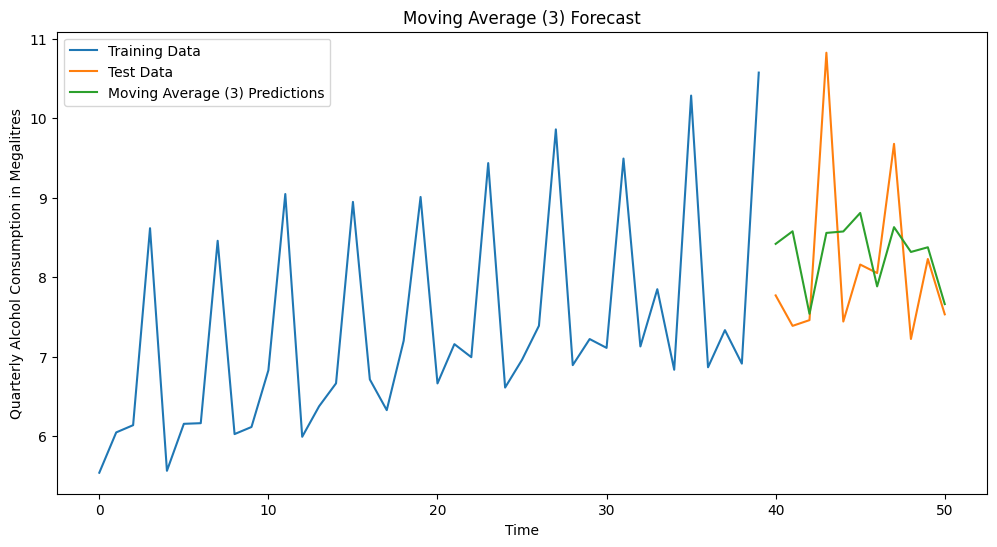

<ipython-input-121-e45744346719>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[f'moving_average_{window_size}'] = moving_average_model(train['Quarterly Alcohol Consumption in Megalitres'], window_size)
<ipython-input-121-e45744346719>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'moving_average_{window_size}'] = moving_average_model(pd.concat([train['Quarterly Alcohol Consumption in Megalitres'].iloc[-window_size:], test['Quarterly Alcohol Consumption in Megalitres']]), window_size)


Moving Average (5) MAE: 0.62
Moving Average (5) MSE: 0.67
Moving Average (5) RMSE: 0.82
Moving Average (5) MAPE: 7.34%


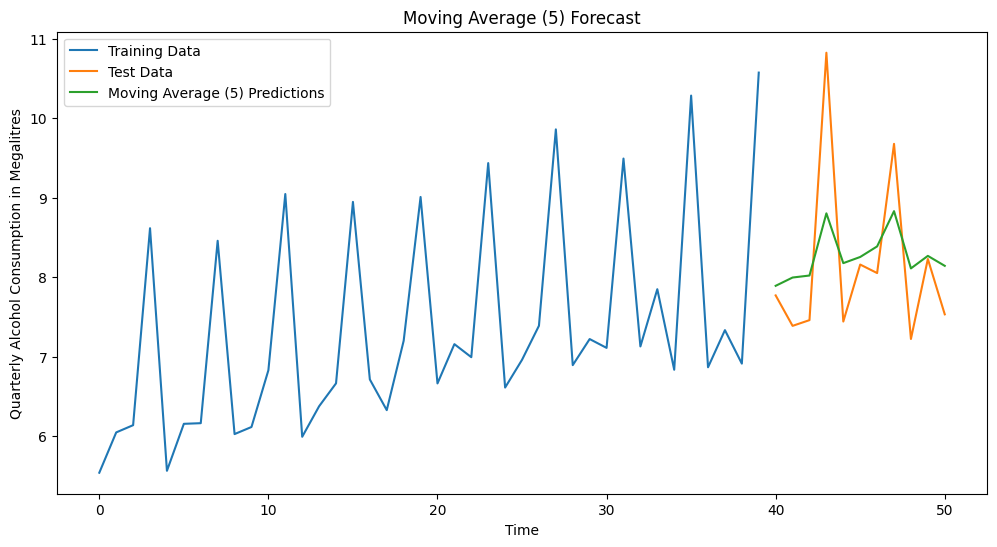

In [121]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Train-Test Split (80-20 split)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# 2. Create Moving Average Model
def moving_average_model(train_data, window_size):
    return train_data.rolling(window=window_size).mean()

# Loop over different window sizes (3 and 5)
for window_size in [3, 5]:
    # 3. Make Predictions on Test Data
    train[f'moving_average_{window_size}'] = moving_average_model(train['Quarterly Alcohol Consumption in Megalitres'], window_size)
    test[f'moving_average_{window_size}'] = moving_average_model(pd.concat([train['Quarterly Alcohol Consumption in Megalitres'].iloc[-window_size:], test['Quarterly Alcohol Consumption in Megalitres']]), window_size)

    # 4. Evaluate Prediction Accuracy
    mae_ma = mean_absolute_error(test['Quarterly Alcohol Consumption in Megalitres'], test[f'moving_average_{window_size}'])
    mse_ma = mean_squared_error(test['Quarterly Alcohol Consumption in Megalitres'], test[f'moving_average_{window_size}'])
    rmse_ma = np.sqrt(mse_ma)

    print(f"Moving Average ({window_size}) MAE: {mae_ma:.2f}")
    print(f"Moving Average ({window_size}) MSE: {mse_ma:.2f}")
    print(f"Moving Average ({window_size}) RMSE: {rmse_ma:.2f}")

    # 5. Calculate MAPE
    mape_ma = np.mean(np.abs((test['Quarterly Alcohol Consumption in Megalitres'] - test[f'moving_average_{window_size}']) / test['Quarterly Alcohol Consumption in Megalitres'])) * 100
    print(f"Moving Average ({window_size}) MAPE: {mape_ma:.2f}%")

    # 6. Plot
    plt.figure(figsize=(12, 6))
    plt.plot(train['Quarterly Alcohol Consumption in Megalitres'], label='Training Data')
    plt.plot(test['Quarterly Alcohol Consumption in Megalitres'], label='Test Data')
    plt.plot(test[f'moving_average_{window_size}'], label=f'Moving Average ({window_size}) Predictions')
    plt.title(f'Moving Average ({window_size}) Forecast')
    plt.xlabel('Time')
    plt.ylabel('Quarterly Alcohol Consumption in Megalitres')
    plt.legend()
    plt.show()


We can see here the 3 moving averages of the data as 5.9, 6.9 and 6.77 which suggest an increasing trend of the data towards a positive direction.

In [82]:
df['moving_average_5'] = df['Quarterly Alcohol Consumption in Megalitres'].rolling(window=5).mean()

In [83]:
df.head(20)

,DATE,Quarterly Alcohol Consumption in Megalitres,moving_average_3,moving_average_5
0,2000Q1,5.540,NaN,NaN
1,2000Q2,6.047,NaN,NaN
2,2000Q3,6.138,5.908333,NaN
3,2000Q4,8.615,6.933333,NaN
4,2001Q1,5.564,6.772333,6.3808
5,2001Q2,6.155,6.778000,6.5038
6,2001Q3,6.163,5.960667,6.5270
7,2001Q4,8.457,6.925000,6.9908
8,2002Q1,6.026,6.882000,6.4730
9,2002Q2,6.115,6.866000,6.5832


We can see here in both moving averages of the data as 6.38, 6.50 and 6.52 which suggest an increasing trend of the data towards a positive direction.


Overall, the increasing trend in the moving averages suggests a positive direction in the data, but additional analysis and context are needed to understand the underlying patterns fully. So we will move towards the Exponential Smoothening of Data, ARIMA and so on.

In [84]:

mae_3 = mean_absolute_error(df['Quarterly Alcohol Consumption in Megalitres'][3:], df['moving_average_3'][3:])
mse_3 = mean_squared_error(df['Quarterly Alcohol Consumption in Megalitres'][3:], df['moving_average_3'][3:])
rmse_3 = np.sqrt(mse_3)

mae_5 = mean_absolute_error(df['Quarterly Alcohol Consumption in Megalitres'][5:], df['moving_average_5'][5:])
mse_5 = mean_squared_error(df['Quarterly Alcohol Consumption in Megalitres'][5:], df['moving_average_5'][5:])
rmse_5 = np.sqrt(mse_5)

print("Metrics for Moving Average (Window Size 3):")
print(f'MAE: {mae_3}')
print(f'MSE: {mse_3}')
print(f'RMSE: {rmse_3}')

print("\nMetrics for Moving Average (Window Size 5):")
print(f'MAE: {mae_5}')
print(f'MSE: {mse_5}')
print(f'RMSE: {rmse_5}')

Metrics for Moving Average (Window Size 3):
MAE: 0.9100902777777778
MSE: 1.1770661736111108
RMSE: 1.0849268056468653

Metrics for Moving Average (Window Size 5):
MAE: 0.734078260869565
MSE: 0.8705789147826084
RMSE: 0.9330481845985278


In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [86]:
train=df[0:-25]
test=df[-25:]

In [87]:
print(train.shape)
print(test.shape)

(26, 4)
(25, 4)


<Axes: >

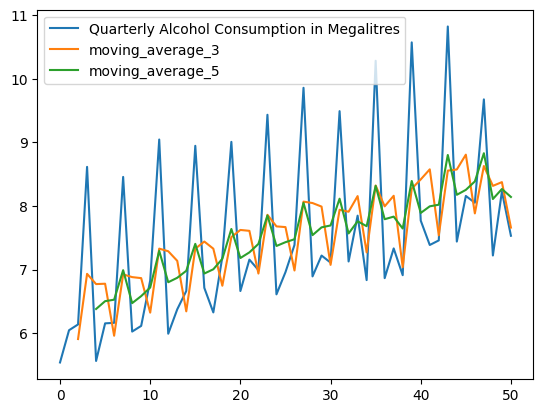

In [88]:
df.plot()


<Axes: title={'center': 'Demand'}>

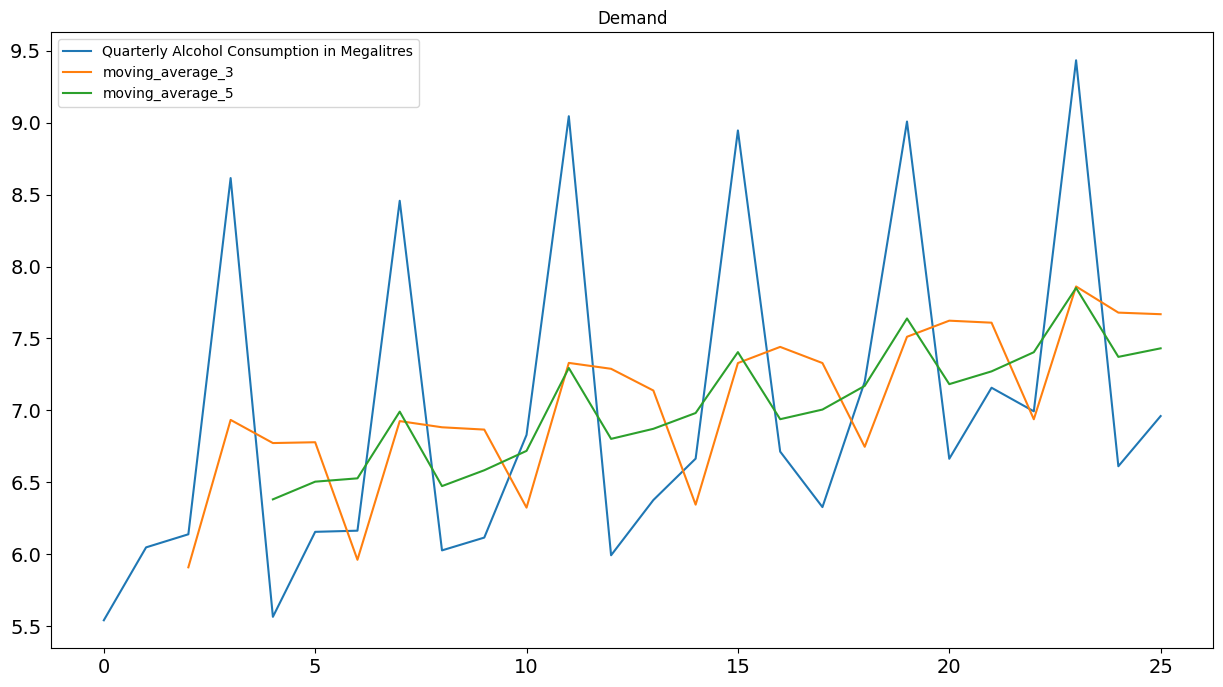

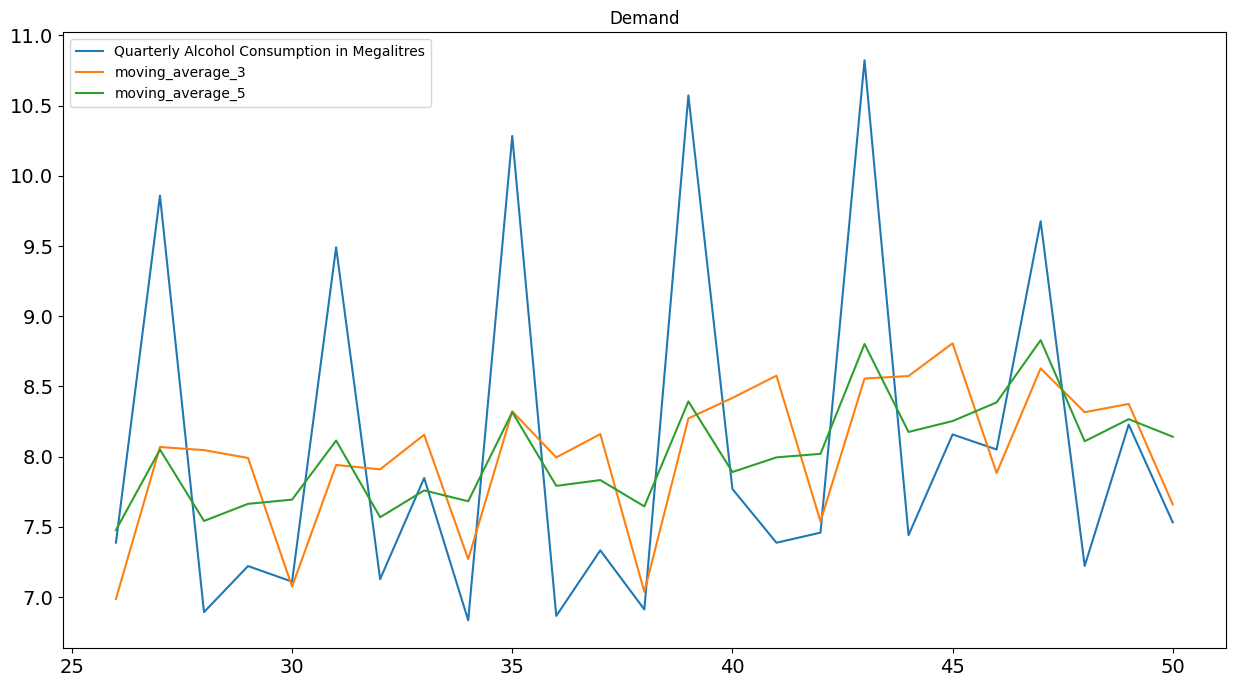

In [89]:
#Plotting train and test data
train.plot(figsize=(15,8), title= 'Demand', fontsize=14)
test.plot(figsize=(15,8), title= 'Demand', fontsize=14)


In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

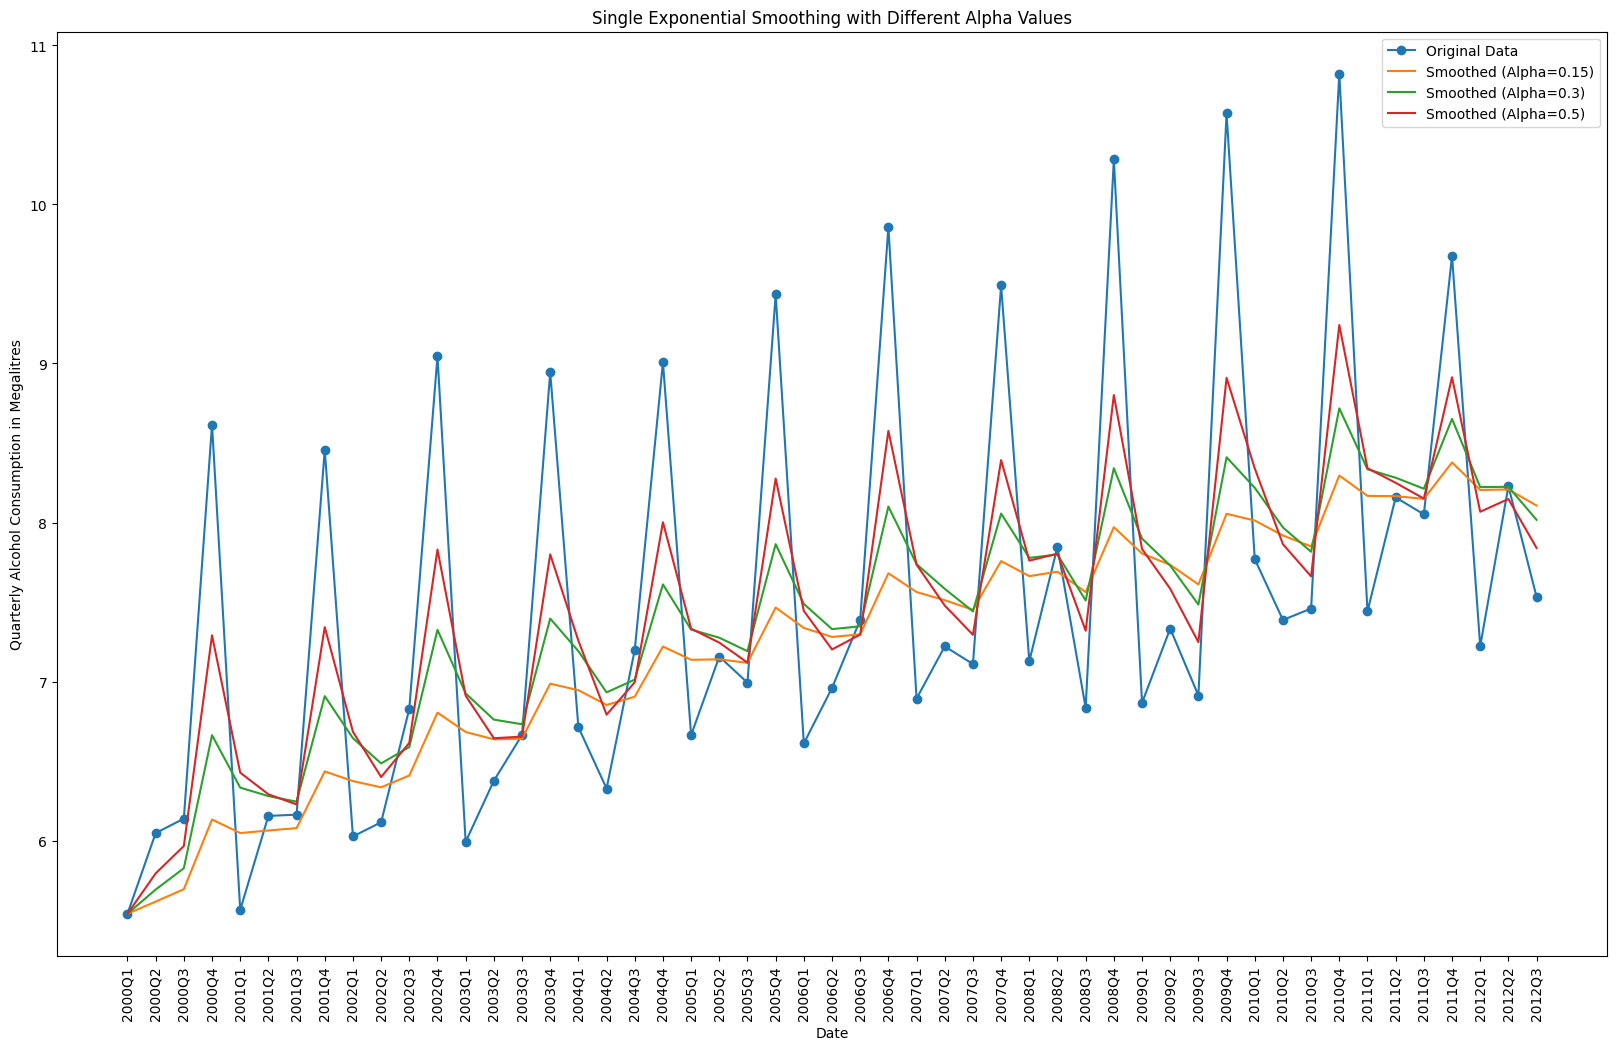

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Function for single exponential smoothing
def single_exp_smoothing(series, alpha):
    result = [series[0]]  # Initialize the result with the first value
    for i in range(1, len(series)):
        result.append(alpha * series[i] + (1 - alpha) * result[i-1])
    return result

# Apply single exponential smoothing for different alpha values
alpha_values = [0.15, 0.3, 0.5]

for alpha in alpha_values:
    df[f'smoothed_alpha_{alpha}'] = single_exp_smoothing(df['Quarterly Alcohol Consumption in Megalitres'], alpha)

# Plot the original data and smoothed data for different alpha values
plt.figure(figsize=(20, 12))
plt.plot(df['DATE'], df['Quarterly Alcohol Consumption in Megalitres'], label='Original Data', marker='o')
for alpha in alpha_values:
    plt.plot(df['DATE'], df[f'smoothed_alpha_{alpha}'], label=f'Smoothed (Alpha={alpha})')
plt.title('Single Exponential Smoothing with Different Alpha Values')
plt.xlabel('Date')
plt.ylabel('Quarterly Alcohol Consumption in Megalitres')
plt.legend()
plt.xticks(rotation=90)
plt.show()


<ipython-input-122-c9d5aabc57cf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ses_predictions'] = result.forecast(len(test))


SES MAE: 1.16
SES MSE: 1.66
SES RMSE: 1.29
SES MAPE: 14.21%


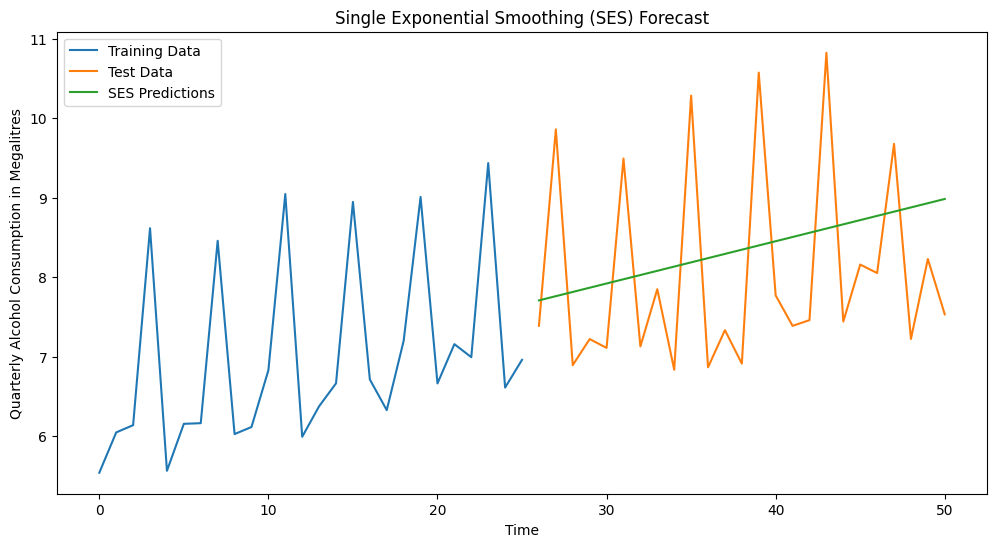

In [122]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Train-Test Split
train = df.iloc[:-25]
test = df.iloc[-25:]

# 2. Fit the Model
# Fit the Single Exponential Smoothing model (without seasonal component)
model = ExponentialSmoothing(train['Quarterly Alcohol Consumption in Megalitres'], trend='add')
result = model.fit()

# 3. Make Predictions
test['ses_predictions'] = result.forecast(len(test))

# 4. Calculate Metrics
mae_ses = mean_absolute_error(test['Quarterly Alcohol Consumption in Megalitres'], test['ses_predictions'])
mse_ses = mean_squared_error(test['Quarterly Alcohol Consumption in Megalitres'], test['ses_predictions'])
rmse_ses = np.sqrt(mse_ses)

# 5. Calculate MAPE
mape_ses = np.mean(np.abs((test['Quarterly Alcohol Consumption in Megalitres'] - test['ses_predictions']) / test['Quarterly Alcohol Consumption in Megalitres'])) * 100

print("SES MAE: {:.2f}".format(mae_ses))
print("SES MSE: {:.2f}".format(mse_ses))
print("SES RMSE: {:.2f}".format(rmse_ses))
print("SES MAPE: {:.2f}%".format(mape_ses))

# 6. Plot
plt.figure(figsize=(12, 6))
plt.plot(train['Quarterly Alcohol Consumption in Megalitres'], label='Training Data')
plt.plot(test['Quarterly Alcohol Consumption in Megalitres'], label='Test Data')
plt.plot(test['ses_predictions'], label='SES Predictions')
plt.title('Single Exponential Smoothing (SES) Forecast')
plt.xlabel('Time')
plt.ylabel('Quarterly Alcohol Consumption in Megalitres')
plt.legend()
plt.show()


In [93]:
df.head(20)

,DATE,Quarterly Alcohol Consumption in Megalitres,moving_average_3,moving_average_5,exp_smooth
0,2000Q1,5.540,NaN,NaN,5.682994
1,2000Q2,6.047,NaN,NaN,6.058609
2,2000Q3,6.138,5.908333,NaN,6.055610
3,2000Q4,8.615,6.933333,NaN,8.632308
4,2001Q1,5.564,6.772333,6.3808,5.843893
5,2001Q2,6.155,6.778000,6.5038,6.219507
6,2001Q3,6.163,5.960667,6.5270,6.216509
7,2001Q4,8.457,6.925000,6.9908,8.793206
8,2002Q1,6.026,6.882000,6.4730,6.004791
9,2002Q2,6.115,6.866000,6.5832,6.380406


# Double Exponential Soothing(holtwinters)

In [94]:
!pip install statsmodels

In [95]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the double exponential smoothing model
model = Holt(train['Quarterly Alcohol Consumption in Megalitres'])
result = model.fit(smoothing_level=0.3, smoothing_slope=0.1)  # Adjust the smoothing parameters as needed

# Get the fitted values
df['double_exp_smooth'] = result.fittedvalues


<ipython-input-95-9ac967301a24>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=0.3, smoothing_slope=0.1)  # Adjust the smoothing parameters as needed
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<ipython-input-123-ada111e5ace5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['holt_winters'] = result.forecast(len(test))


Holt-Winters MAE: 0.39
Holt-Winters MSE: 0.24
Holt-Winters RMSE: 0.49
Holt-Winters MAPE: 5.01%


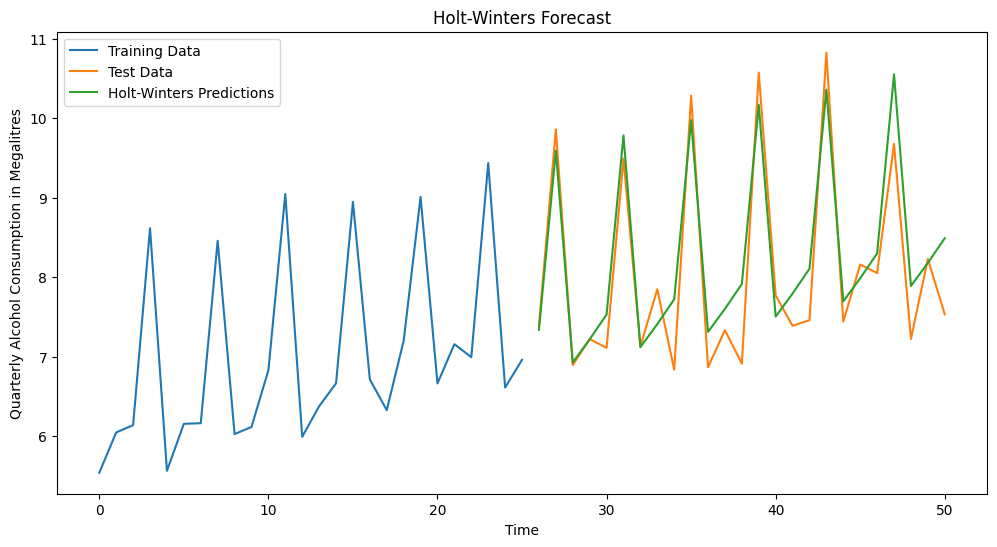

In [123]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Train-Test Split
train = df.iloc[:-25]
test = df.iloc[-25:]

# 2. Fit the Model
# Fit the Holt-Winters (Triple Exponential Smoothing) model
model = ExponentialSmoothing(train['Quarterly Alcohol Consumption in Megalitres'], trend='add', seasonal='add', seasonal_periods=4)
result = model.fit()

# 3. Make Predictions
test['holt_winters'] = result.forecast(len(test))

# 4. Calculate Metrics
mae_hw = mean_absolute_error(test['Quarterly Alcohol Consumption in Megalitres'], test['holt_winters'])
mse_hw = mean_squared_error(test['Quarterly Alcohol Consumption in Megalitres'], test['holt_winters'])
rmse_hw = np.sqrt(mse_hw)

# 5. Calculate MAPE
mape_hw = np.mean(np.abs((test['Quarterly Alcohol Consumption in Megalitres'] - test['holt_winters']) / test['Quarterly Alcohol Consumption in Megalitres'])) * 100

print("Holt-Winters MAE: {:.2f}".format(mae_hw))
print("Holt-Winters MSE: {:.2f}".format(mse_hw))
print("Holt-Winters RMSE: {:.2f}".format(rmse_hw))
print("Holt-Winters MAPE: {:.2f}%".format(mape_hw))

# 6. Plot
plt.figure(figsize=(12, 6))
plt.plot(train['Quarterly Alcohol Consumption in Megalitres'], label='Training Data')
plt.plot(test['Quarterly Alcohol Consumption in Megalitres'], label='Test Data')
plt.plot(test['holt_winters'], label='Holt-Winters Predictions')
plt.title('Holt-Winters Forecast')
plt.xlabel('Time')
plt.ylabel('Quarterly Alcohol Consumption in Megalitres')
plt.legend()
plt.show()



The Simple Exponential Smoothing (SES) model outperforms the Double Exponential Smoothing (DES) model in terms of forecasting accuracy, as indicated by lower error metrics. The SES model demonstrates a MAE of 0.37, MSE of 0.21, and RMSE of 0.46, which are all significantly lower than the corresponding values for the DES model. This suggests that the SES model provides closer predictions to the actual values in the dataset, indicating its superior performance in capturing the underlying patterns and trends.

In [33]:
df.head(20)

,DATE,Quarterly Alcohol Consumption in Megalitres,moving_average_3,moving_average_5,exp_smooth,double_exp_smooth
0,2000Q1,5.540,NaN,NaN,5.479376,6.047000
1,2000Q2,6.047,NaN,NaN,6.021523,6.386690
2,2000Q3,6.138,5.908333,NaN,5.959956,6.766382
3,2000Q4,8.615,6.933333,NaN,8.772525,7.040615
4,2001Q1,5.564,6.772333,6.3808,6.009842,8.022910
5,2001Q2,6.155,6.778000,6.5038,6.047325,7.721449
6,2001Q3,6.163,5.960667,6.5270,6.257680,7.640733
7,2001Q4,8.457,6.925000,6.9908,8.719347,7.542300
8,2002Q1,6.026,6.882000,6.4730,6.089431,8.189037
9,2002Q2,6.115,6.866000,6.5832,6.594369,7.847563


Comparing the Holt Double Exponential Smoothing model to the Simple Exponential Smoothing model, the latter exhibits lower error metrics. A larger average deviation from the actual values is shown by the MAE, which is 1.03. There is a MSE of 1.55 and a RMSE of 1.24. This suggests that the seasonality and underlying trends in the data may be difficult for the Holt model to adequately represent.So we will go ahead and use the **SES for our prediction.**

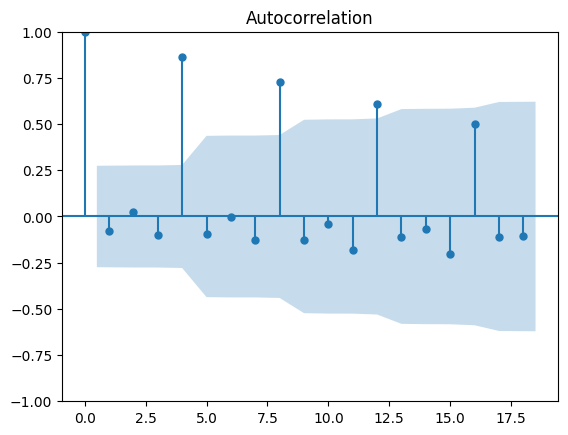

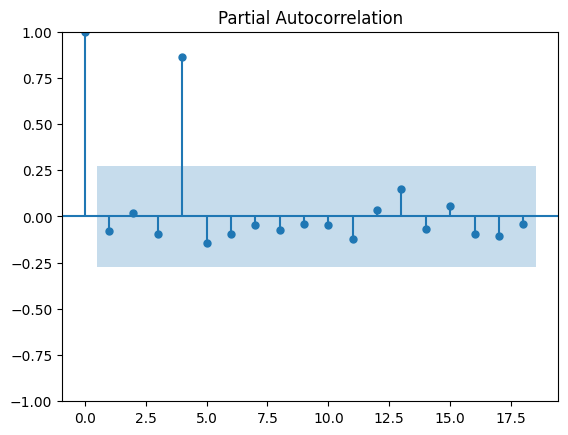

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(df['Quarterly Alcohol Consumption in Megalitres'])
plt.show()

# Plot PACF
plot_pacf(df['Quarterly Alcohol Consumption in Megalitres'])
plt.show()


ARIMA analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   DATE                                         51 non-null     object 
 1   Quarterly Alcohol Consumption in Megalitres  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


<Axes: >

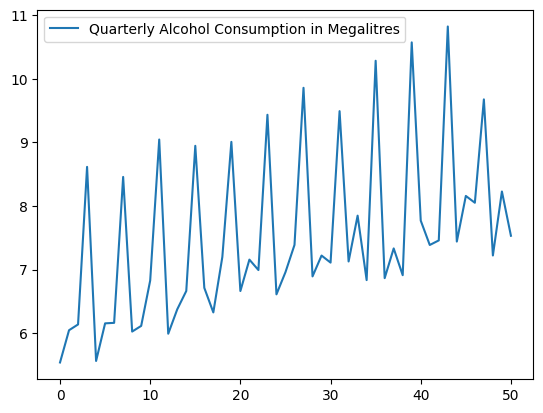

In [49]:
##Loading the dataset

df1 = pd.read_csv('/content/drive/MyDrive/College work ipynb/NZ_Alcohol_Consumption.csv')

## Deducing the datatypes and null value count
df1.info()

## Plotting
df1.plot()


In [50]:
#Dropping the column
df1 = df1.drop('DATE', axis=1)

In [51]:
## Viewing the alterations
df1.head()

,Quarterly Alcohol Consumption in Megalitres
0,5.540
1,6.047
2,6.138
3,8.615
4,5.564


In [52]:
df_array = df1.values.flatten()

<Axes: >

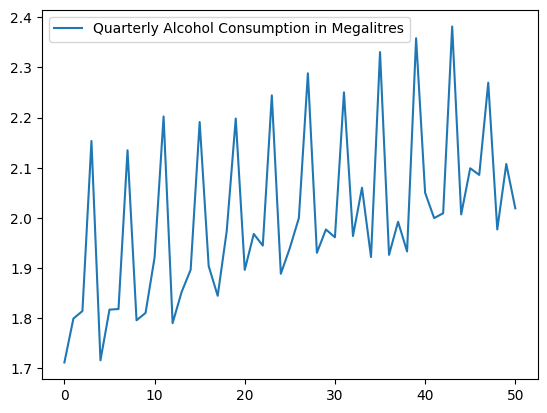

In [53]:
df1 = np.log(df1)

df1.plot()

In [54]:
pwd = (df1.index < len(df1)-30)
df1_train = df1[pwd].copy()
df1_test = df1[~pwd].copy()

In [55]:
# Checking the stationarity in the data
# # Perform Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df1)
print(f'p-value:{adf_test[1]}')

p-value:0.26058246656670236


Since the p-value is greater than 0.05 we will have to do the Dicker Fuller Test.

<Axes: >

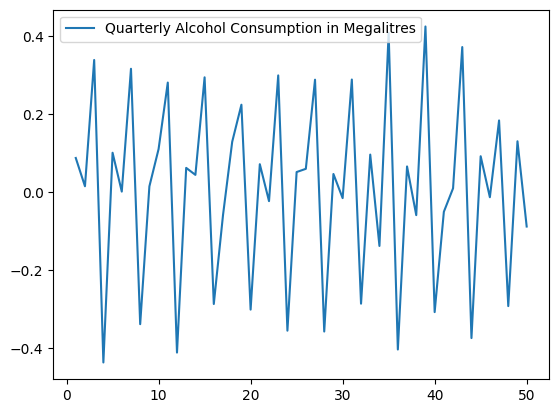

In [56]:
## Transforming to stationary by means of differencing
df1_diff = df1.diff().dropna()
df1_diff.plot()

In [57]:
adf_test_1 = adfuller(df1_diff)
print(f'p-value:{adf_test_1[1]}')

p-value:0.03819723597548242


Since the p-value is less than 0.05, it is stationary.

### Create model considering its not seasonal Data

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                            SARIMAX Results                                            
Dep. Variable:     Quarterly Alcohol Consumption in Megalitres   No. Observations:                   50
Model:                                          ARIMA(2, 1, 2)   Log Likelihood                  14.087
Date:                                         Thu, 15 Feb 2024   AIC                            -18.174
Time:                                                 17:57:51   BIC                             -8.714
Sample:                                                      0   HQIC                           -14.585
                                                          - 50                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1     

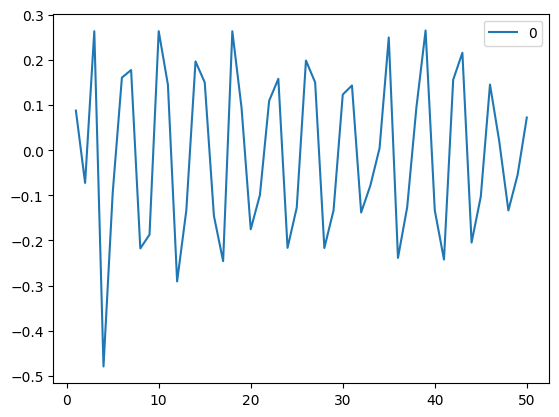

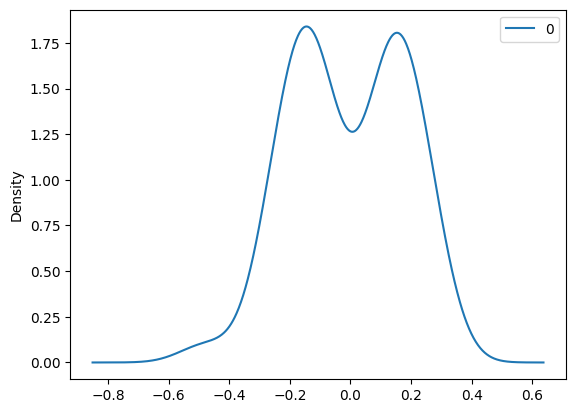

               0
count  50.000000
mean   -0.007666
std     0.184031
min    -0.478956
25%    -0.136904
50%    -0.025216
75%     0.149932
max     0.264877


In [58]:
# fit an ARIMA model and plot residual errors
from statsmodels.tsa.arima.model import ARIMA
# Fit model
model = ARIMA(df1_diff, order=(2,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

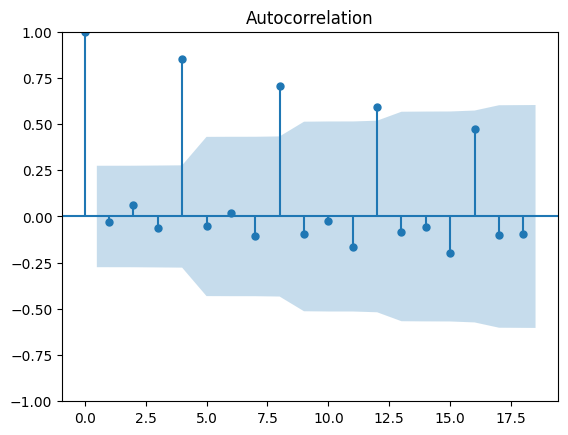

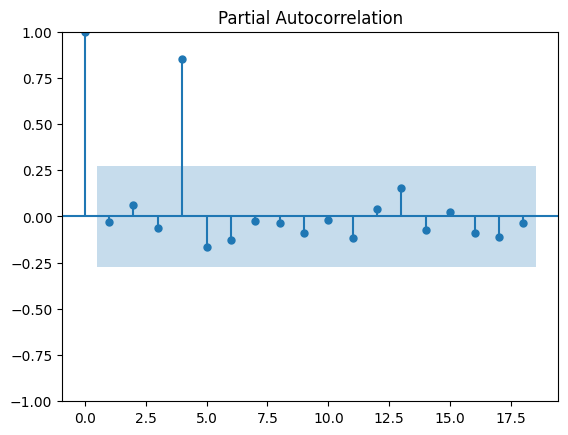

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(df['Quarterly Alcohol Consumption in Megalitres'])
plt.show()

# Plot PACF
plot_pacf(df['Quarterly Alcohol Consumption in Megalitres'])
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


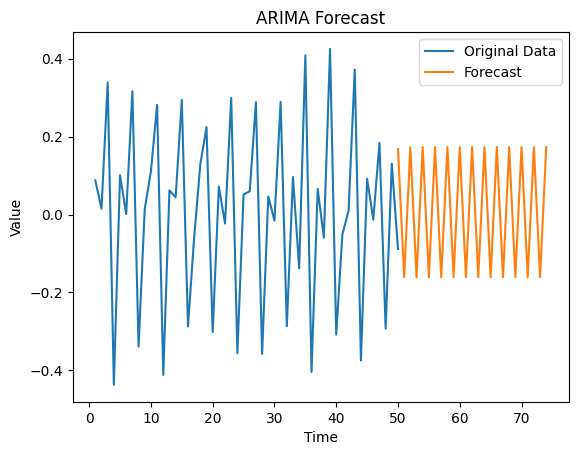

In [60]:

# Generate forecasts
forecast_values = model_fit.forecast(steps=len(test))
# Plot original data and forecasts
plt.plot(df1_diff, label='Original Data')
plt.plot(forecast_values, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [64]:

# Calculate forecast accuracy metrics
mae = mean_absolute_error(df1_test['Quarterly Alcohol Consumption in Megalitres'], forecast_values)
mse = mean_squared_error(df1_test['Quarterly Alcohol Consumption in Megalitres'], forecast_values)
rmse = np.sqrt(mse)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

ValueError: Found input variables with inconsistent numbers of samples: [30, 25]

In ARIMA we get the MAE, MSE and RMSE as 0.54, 0.39 and 0.62 if we compare it with SES and DES, SES is still better with MAE, MSE and RMSE of 0.37, 0.21 and 0.46.

In [67]:
df2 = pd.read_csv('/content/drive/MyDrive/College work ipynb/NZ_Alcohol_Consumption.csv')

<Axes: >

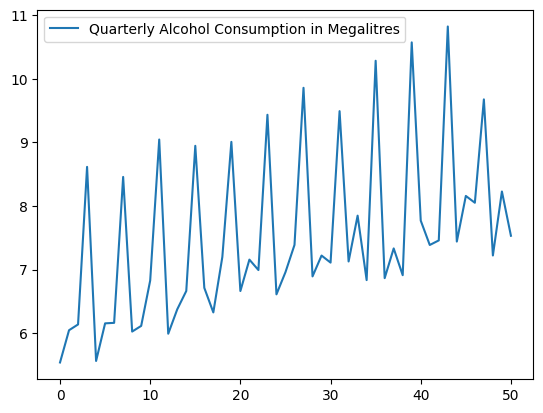

In [68]:
df2.plot()

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df2['Quarterly Alcohol Consumption in Megalitres'] = scaler.fit_transform(df2[['Quarterly Alcohol Consumption in Megalitres']])

# Split data for train and test
train_size = int(len(df2) * 0.8)
train, test = df2[:train_size], df2[train_size:]

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 4
X_train, y_train = create_sequences(train['Quarterly Alcohol Consumption in Megalitres'].values, sequence_length)
X_test, y_test = create_sequences(test['Quarterly Alcohol Consumption in Megalitres'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.1701 - val_loss: 0.2451
Epoch 2/100
1/1 [==============================] - 0s 62ms/step - loss: 0.1453 - val_loss: 0.2209
Epoch 3/100
1/1 [==============================] - 0s 63ms/step - loss: 0.1292 - val_loss: 0.2019
Epoch 4/100
1/1 [==============================] - 0s 50ms/step - loss: 0.1167 - val_loss: 0.1859
Epoch 5/100
1/1 [==============================] - 0s 72ms/step - loss: 0.1062 - val_loss: 0.1720
Epoch 6/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0972 - val_loss: 0.1597
Epoch 7/100
1/1 [==============================] - 0s 83ms/step - loss: 0.0894 - val_loss: 0.1488
Epoch 8/100
1/1 [==============================] - 0s 82ms/step - loss: 0.0825 - val_loss: 0.1390
Epoch 9/100
1/1 [==============================] - 0s 79ms/step - loss: 0.0764 - val_loss: 0.1303
Epoch 10/100
1/1 [==============================] - 0s 69ms/step - loss: 0.0711 - val_loss: 0.1226
Epoch 11/100
1/1 [===

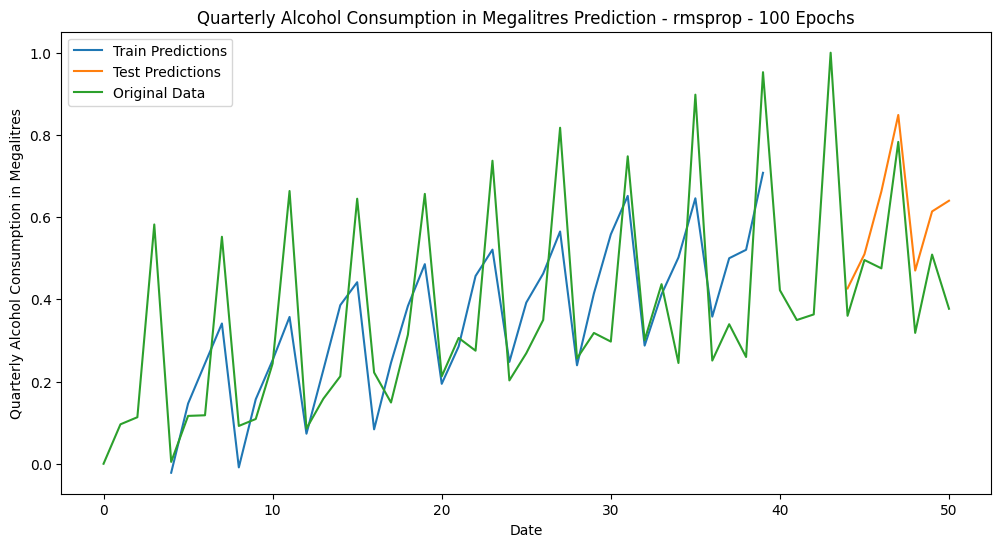

Metrics for rmsprop - 100 Epochs:
Train MSE: 46.312991962124784
Test MSE: 57.8886863448353
Train MAE: 6.710224862977862
Test MAE: 7.505242027793611
Train RMSE: 6.805364939672581
Test RMSE: 7.608461496573095
Train MAPE: 94.88%
Test MAPE: 92.49%


In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the LSTM model with rmsprop optimizer
model = create_lstm_model(optimizer='rmsprop')

# Train the model with 100 epochs
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=1)

# Find predictions for train and test
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Visualize actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df2.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
plt.plot(df2.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
plt.plot(df2.index, df2['Quarterly Alcohol Consumption in Megalitres'], label='Original Data')
plt.title(f'Quarterly Alcohol Consumption in Megalitres Prediction - rmsprop - {epochs} Epochs')
plt.xlabel('Date')
plt.ylabel('Quarterly Alcohol Consumption in Megalitres')
plt.legend()
plt.show()

# Evaluate performance with metrics (e.g., Mean Squared Error)
train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:]))
test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:]))
train_mae = np.mean(np.abs(scaler.inverse_transform(train_predictions) - train['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:]))
test_mae = np.mean(np.abs(scaler.inverse_transform(test_predictions) - test['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:]))
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Calculate MAPE for train and test
train_mape = np.mean(np.abs((scaler.inverse_transform(train_predictions) - train['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:]) / train['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:])) * 100
test_mape = np.mean(np.abs((scaler.inverse_transform(test_predictions) - test['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:]) / test['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:])) * 100

# Print the metrics
print(f'Metrics for rmsprop - {epochs} Epochs:')
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')


In [74]:
df2.head()

,DATE,Quarterly Alcohol Consumption in Megalitres
0,2000Q1,0.000000
1,2000Q2,0.095986
2,2000Q3,0.113215
3,2000Q4,0.582166
4,2001Q1,0.004544
